# Results interpretation

## Brief overview

## Imports & global variables

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read all results from CSV files
model_results = dict(
    EuCoHM=pd.read_csv('../results/results_EuCoHM.csv'),
    EuCoHT=pd.read_csv('../results/results_EuCoHT.csv'),
    EuCoBase=pd.read_csv('../results/results_EuCoBase.csv')
)

# Set seaborn theme and color palette
sns.set_theme(style="whitegrid", palette="pastel")

## Data processing

In [14]:
best_results = list()
all_results_df = pd.DataFrame()
for model in model_results.keys():
    # Get best results for model
    best_results.append(model_results[model].max().to_dict())
    
    # Concatenate to all results
    model_results_df = model_results[model].copy()
    model_results_df['model'] = [model] * len(model_results_df)
    all_results_df = pd.concat([all_results_df, model_results_df])
    

# Transform to data frame
best_results_df = pd.DataFrame(best_results)
all_results_df

,epoch,train_loss_bpr,test_loss_bpr,precision@k,recall@k,map@k,mrr@k,ndcg@k,hit_rate@k,model,Unnamed: 0
0,1,0.023746,1.196817,0.006059,0.011710,0.005685,0.009404,0.008835,0.026384,EuCoHM,NaN
1,2,0.039445,0.309839,0.029474,0.054009,0.028251,0.052926,0.044513,0.122801,EuCoHM,NaN
2,3,0.016819,0.204301,0.037930,0.067947,0.037496,0.068901,0.057411,0.153058,EuCoHM,NaN
3,4,0.013305,0.161235,0.041956,0.076153,0.042590,0.074304,0.064162,0.166613,EuCoHM,NaN
4,5,0.011173,0.129179,0.045934,0.084461,0.047143,0.082375,0.070905,0.183395,EuCoHM,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55,56,0.004629,0.636832,0.019448,0.065469,0.030335,0.055884,0.046589,0.124950,EuCoBase,NaN
56,57,0.004490,0.636873,0.019456,0.065496,0.030382,0.055930,0.046632,0.124950,EuCoBase,NaN
57,58,0.004508,0.636913,0.019464,0.065523,0.030381,0.055928,0.046639,0.125030,EuCoBase,NaN
58,59,0.004556,0.636950,0.019464,0.065523,0.030370,0.055943,0.046636,0.125030,EuCoBase,NaN


## Model performance table

In [15]:
best_results_df['epoch'] = best_results_df['epoch'].astype(int)
best_results_df['train_loss_bpr'] = best_results_df['train_loss_bpr'].round(3)
best_results_df['test_loss_bpr'] = best_results_df['test_loss_bpr'].round(3)
best_results_df['precision@k'] = best_results_df['precision@k'].round(3)
best_results_df['recall@k'] = best_results_df['recall@k'].round(3)
best_results_df['map@k'] = best_results_df['map@k'].round(3)
best_results_df['mrr@k'] = best_results_df['mrr@k'].round(3)
best_results_df['ndcg@k'] = best_results_df['ndcg@k'].round(3)
best_results_df['hit_rate@k'] = best_results_df['hit_rate@k'].round(3)
best_results_df

,epoch,train_loss_bpr,test_loss_bpr,precision@k,recall@k,map@k,mrr@k,ndcg@k,hit_rate@k,Unnamed: 0
0,60,0.039,1.197,0.091,0.195,0.108,0.172,0.155,0.354,NaN
1,99,0.061,33.936,0.012,0.041,0.014,0.028,0.025,0.086,98.0
2,60,0.693,0.693,0.021,0.066,0.031,0.057,0.048,0.125,NaN


## Loss curve

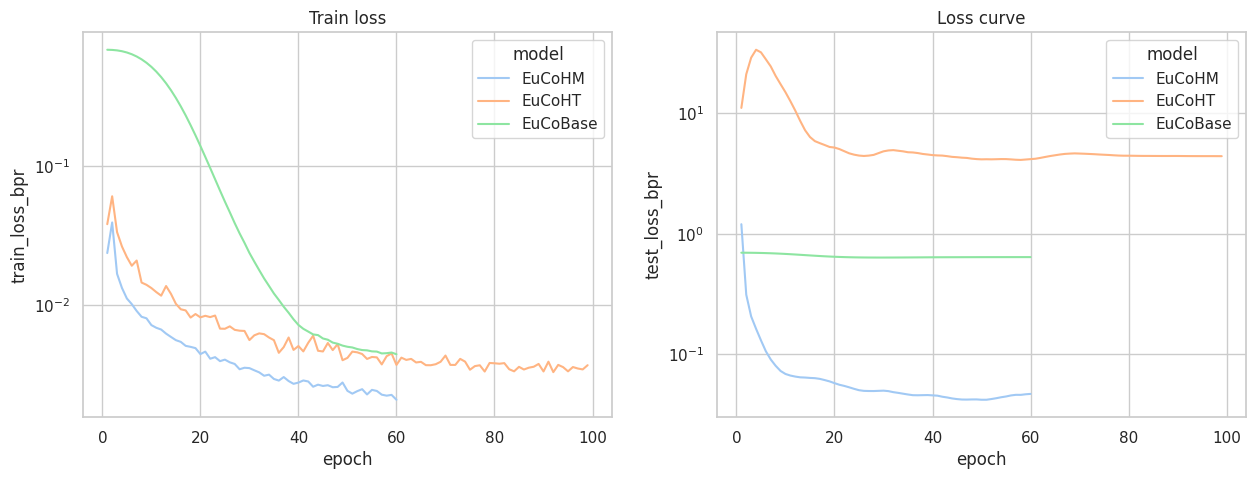

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate loss curve
hue_order = all_results_df['model'].unique()

# Train loss
sns.lineplot(data=all_results_df, 
              x='epoch',
              y='train_loss_bpr',
              hue='model',
              hue_order=hue_order,
              ax=axs[0])
axs[0].set_title("Train loss")
axs[0].set_yscale('log')

# Test loss
sns.lineplot(data=all_results_df, 
              x='epoch',
              y='test_loss_bpr',
              hue='model',
              hue_order=hue_order,
              ax=axs[1])
axs[1].set_title("Test loss")
axs[1].set_yscale('log')
plt.title('Loss curve')
plt.show()

## Model evaluation metrics

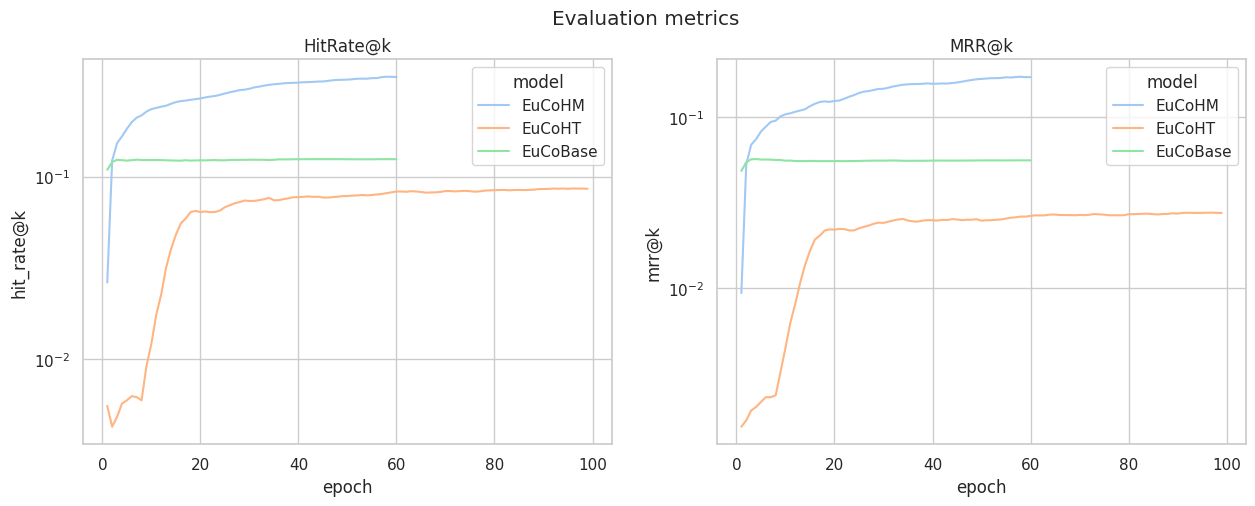

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate loss curve
hue_order = all_results_df['model'].unique()

# Train loss
sns.lineplot(data=all_results_df, 
              x='epoch',
              y='hit_rate@k',
              hue='model',
              hue_order=hue_order,
              ax=axs[0])
axs[0].set_title("HitRate@k")
axs[0].set_yscale('log')

# Test loss
sns.lineplot(data=all_results_df, 
              x='epoch',
              y='mrr@k',
              hue='model',
              hue_order=hue_order,
              ax=axs[1])
axs[1].set_title("MRR@k")
axs[1].set_yscale('log')
plt.suptitle('Evaluation metrics')
plt.show()